In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-prices-dataset/Housing.csv
/kaggle/input/housing-linear/Housing_linear.csv


In [5]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [26]:
data = pd.read_csv('/kaggle/input/housing-linear/Housing_linear.csv')


In [27]:
data.columns

Index(['price', 'area'], dtype='object')

In [28]:
type(data)

pandas.core.frame.DataFrame

In [29]:
data


,price,area
0,150000,1000
1,220000,1200
2,280000,1500
3,300000,1650
4,250000,1400
5,180000,1100
6,350000,1800
7,210000,1300
8,400000,2000
9,270000,1550


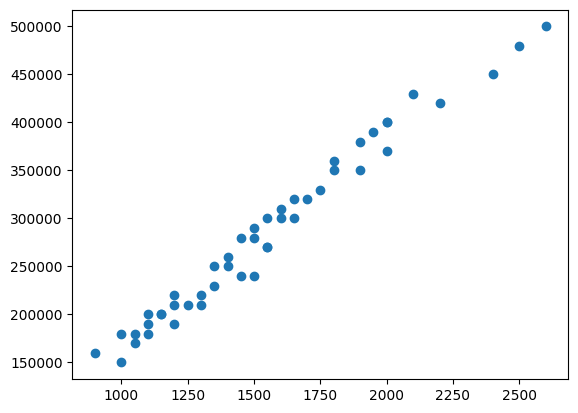

In [33]:
plt.scatter(data['area'],data['price'])

In [35]:
x = data['area']
y = data['price']

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [85]:
X_train = X_train.to_numpy()  # Reshape to 2D with one feature
Y_train = Y_train.to_numpy() # Reshape to 2D array (optional for linear regression)

X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()


In [87]:
X_train = X_train.reshape(-1, 1) # convert single feature into 2d array
X_test = X_test.reshape(-1, 1)

In [63]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [65]:
Y_pred = model.predict(X_test)
print(X_test)
print(Y_pred)

[[1300]
 [1050]
 [1600]
 [2600]
 [1100]
 [2100]
 [1450]
 [1500]
 [1400]
 [2000]]
[231085.63017829 177267.05125466 295667.92488664 510942.24058116
 188030.76703938 403305.0827339  263376.77753246 274140.49331719
 252613.06174774 381777.65116445]


In [88]:
print(X_test.shape)
Y_pred = Y_pred.reshape(-1,1)
Y_test = Y_test.reshape(-1, 1)
print(Y_test.shape)

(10, 1)
(10, 1)


In [100]:
result = pd.DataFrame(np.hstack([X_test, Y_pred]), columns=['area','p_price'])
result[]
result

,area,p_price
0,1300.0,231085.630178
1,1050.0,177267.051255
2,1600.0,295667.924887
3,2600.0,510942.240581
4,1100.0,188030.767039
5,2100.0,403305.082734
6,1450.0,263376.777532
7,1500.0,274140.493317
8,1400.0,252613.061748
9,2000.0,381777.651164


In [101]:
test = pd.DataFrame(np.hstack([X_test, Y_test]), columns=['area','price'])
test

,area,price
0,1300,220000
1,1050,180000
2,1600,310000
3,2600,500000
4,1100,190000
5,2100,430000
6,1450,240000
7,1500,290000
8,1400,250000
9,2000,400000


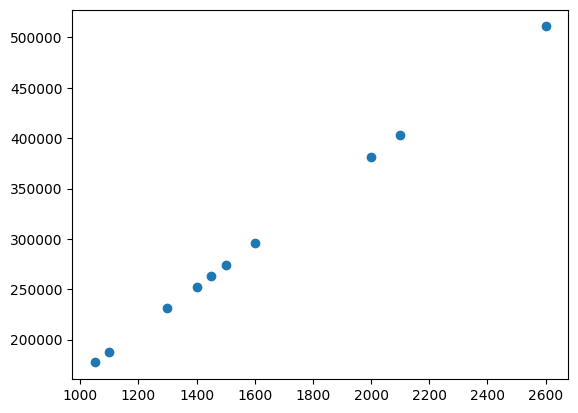

In [102]:
plt.scatter(X_test, Y_pred) #prediction plot

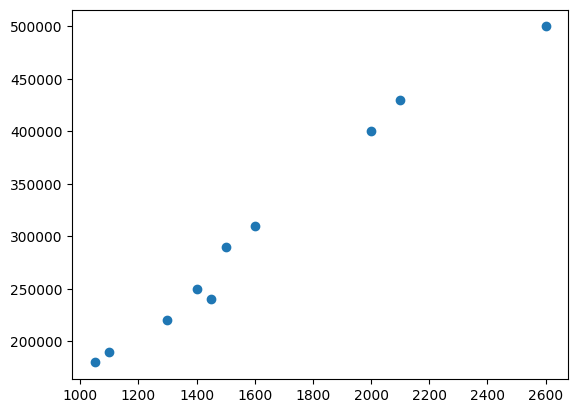

In [103]:
plt.scatter(X_test, Y_test)

> ## Model Evaluation

In [115]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [111]:
mse = mean_squared_error(test['price'], result['p_price'])
mse

230887746.63889384

In [112]:
rmse = np.sqrt(mse)
rmse

15194.99084036887

In [113]:
mae = mean_absolute_error(test['price'], result['p_price'])
mae

12782.873964342532

In [116]:
r2 = r2_score(test['price'], result['p_price'])
r2

0.9782366154549068

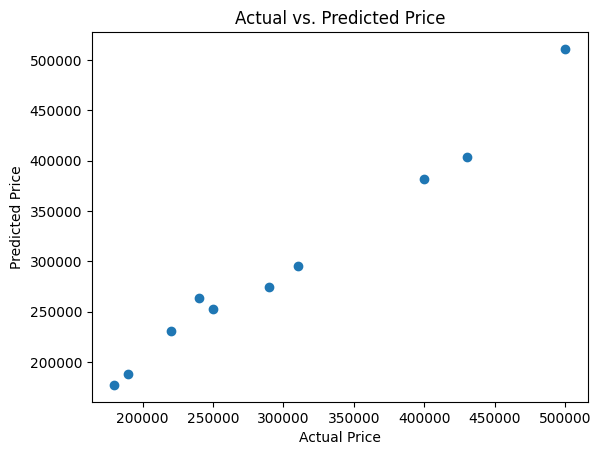

In [118]:

plt.scatter(test['price'], result['p_price'])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Price")
plt.show()
